In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.axes_grid1 import make_axes_locatable


import matplotlib

	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

In [5]:
from shephard.apis import fasta
from shephard import interfaces


# use same amino acid order as in fig 1 from 
AA_ORDERED = ['P', 'F', 'Y', 'W', 'I', 'V', 'L', 'C', 'M', 'G', 'A', 'S', 'T', 'K', 'R', 'D', 'H', 'N', 'E', 'Q']


In [34]:
# read protein sequences
all_sequence = fasta.fasta_to_proteome('parsed_data/sequences.fasta',use_header_as_unique_ID=True)

# annotate with DMS data
interfaces.si_tracks.add_tracks_from_file(all_sequence, 'parsed_data/shprd_track_deltaG.tsv', mode='values')

In [35]:
# get protein of interest
obscurin = all_sequence.protein('1V1C.pdb')

# build DMS matrix
all_data = []
for aa in AA_ORDERED:
    all_data.append(obscurin.track(f'deltaG_{aa}').values)
    
all_data = np.array(all_data)    

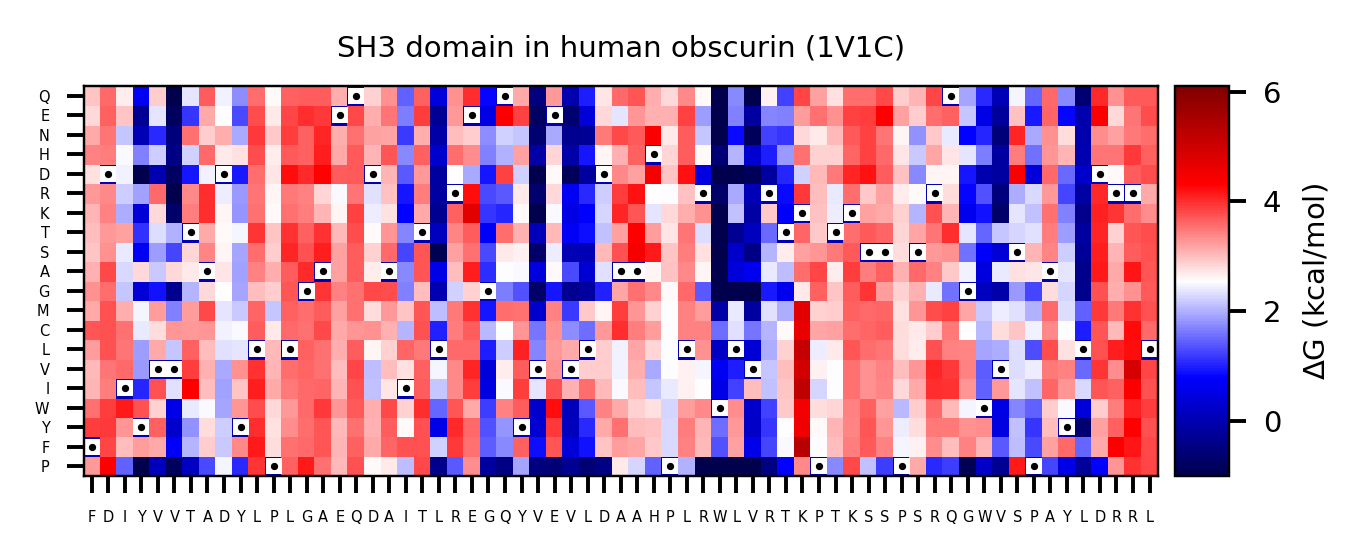

In [37]:
rescount = len(obscurin) +1
figure(None, (4,1.7), dpi=350)
im = plt.pcolor(all_data,cmap='seismic',vmax=6.1, vmin=-1 )

# plot wildtype res
for idx, aa in enumerate(obscurin.sequence):
    y = AA_ORDERED.index(aa)
    x = idx
    plt.plot(x+0.5,y+0.5,'s',ms=3.2,mew=0, color='w', alpha=1)
    plt.plot(x+0.5,y+0.5,'.',ms=3,mew=0, color='k', alpha=1)
                   

        
        
plt.title('SH3 domain in human obscurin (1V1C)', fontsize=6)        
plt.yticks(np.arange(0.5,20.5), AA_ORDERED, fontsize=3)        

plt.xticks(np.arange(0.5,len(obscurin)+0.5), [f'{x}' for x in obscurin.sequence], fontsize=3)        
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(cax=cax)
cb.set_label(r'$\Delta$G (kcal/mol)',fontsize=6)
cb.ax.tick_params(labelsize=6)



plt.tight_layout()